In [19]:
import numpy as numpy
import pandas as pd
import seaborn as sns


In [20]:
df = pd.read_pickle('datos/metadata_clean_alumnos.pkl')

In [21]:
df.head()

,id,popularity,imbd_mean,title,tags_v2
0,862,21.946943,3.888157,Toy Story,animation comedy family jealousy toy boy frien...
1,8844,17.015539,3.236953,Jumanji,adventure fantasy family board game disappeara...
2,15602,11.712900,3.175550,Grumpier Old Men,romance comedy fishing best friend duringcredi...
3,31357,3.859495,2.875713,Waiting to Exhale,comedy drama romance based on novel interracia...
4,11862,8.387519,3.079565,Father of the Bride Part II,comedy baby midlife crisis confidence aging da...


In [22]:
df.describe()

,id,popularity,imbd_mean
count,46165.000000,46161.000000,46165.000000
mean,108614.473952,2.935795,3.058122
std,112549.636587,5.978166,0.732336
min,2.000000,0.000000,0.500000
25%,26355.000000,0.399389,2.687500
50%,60189.000000,1.145935,3.158683
75%,157343.000000,3.721769,3.500000
max,469172.000000,547.488298,5.000000


<Axes: xlabel='popularity', ylabel='title'>

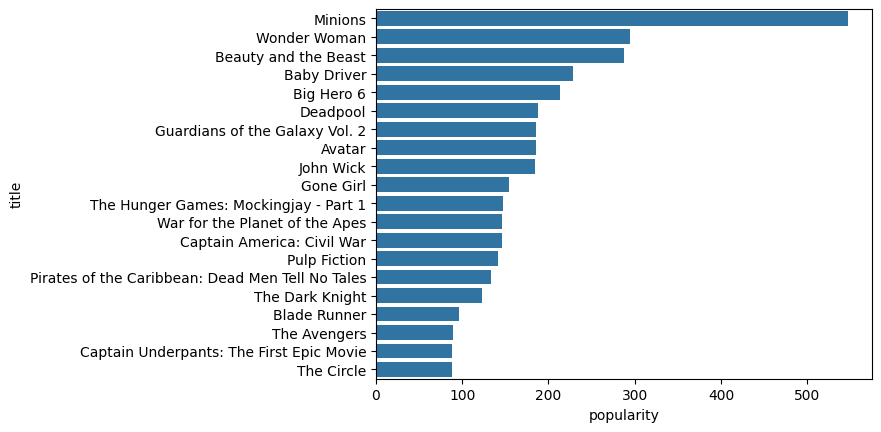

In [23]:
sorted_data = df.sort_values(by='popularity', ascending=False)
top_10_popular_movies = sorted_data.iloc[:20]
sns.barplot(y='title', x='popularity', data=top_10_popular_movies)

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [25]:
documento = ['El gato negro', 'El perro blanco', 'El gato y el perro']

vectorizar = CountVectorizer() # generamos el objeto
vectorizar

CountVectorizer()

In [26]:
x = vectorizar.fit_transform(documento)
print(x)

  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (1, 1)	1
  (1, 4)	1
  (1, 0)	1
  (2, 1)	2
  (2, 2)	1
  (2, 4)	1


In [27]:
print(vectorizar.get_feature_names_out()) # muestra los nombres, omite letras unicas
print(x.toarray()) # esta me da los vectores de cad auno dentro de lista

['blanco' 'el' 'gato' 'negro' 'perro']
[[0 1 1 1 0]
 [1 1 0 0 1]
 [0 2 1 0 1]]


In [28]:
El_gato_negro= x.toarray()[0] #convierto a array y me quedo con el primer elemento de la lista, asi sucesivo
El_perro_blanco = x.toarray()[1]
El_gato_y_el_perro = x.toarray()[2]

In [29]:
similitud_1 = cosine_similarity([El_gato_negro], [El_perro_blanco])
print(similitud_1)

[[0.33333333]]


In [30]:
similitud_2 = cosine_similarity([El_gato_negro], [El_gato_y_el_perro])
print(similitud_2)

[[0.70710678]]


In [31]:
matriz = x.toarray() #matriz de relacion entre los datos
cosine_similarity(matriz)

array([[1.        , 0.33333333, 0.70710678],
       [0.33333333, 1.        , 0.70710678],
       [0.70710678, 0.70710678, 1.        ]])

In [32]:
df.head()

,id,popularity,imbd_mean,title,tags_v2
0,862,21.946943,3.888157,Toy Story,animation comedy family jealousy toy boy frien...
1,8844,17.015539,3.236953,Jumanji,adventure fantasy family board game disappeara...
2,15602,11.712900,3.175550,Grumpier Old Men,romance comedy fishing best friend duringcredi...
3,31357,3.859495,2.875713,Waiting to Exhale,comedy drama romance based on novel interracia...
4,11862,8.387519,3.079565,Father of the Bride Part II,comedy baby midlife crisis confidence aging da...


In [95]:
df['tags_v2'][0]

'animation comedy family jealousy toy boy friendship friends rivalry boy next door new toy toy comes to life woody (voice) buzz lightyear (voice) mr. potato head (voice) slinky dog (voice) rex (voice) hamm (voice) bo peep (voice) andy (voice) sid (voice) mrs. davis (voice) sergeant (voice) hannah (voice) tv announcer (voice) tom hanks tim allen don rickles jim varney wallace shawn john ratzenberger annie potts john morris erik von detten laurie metcalf r. lee ermey sarah freeman penn jillette john lasseter joss whedon andrew stanton joel cohen alec sokolow bonnie arnold ed catmull ralph guggenheim steve jobs lee unkrich ralph eggleston robert gordon mary helen leasman kim blanchette marilyn mccoppen randy newman dale e. grahn robin cooper john lasseter pete docter joe ranft patsy bouge norm decarlo ash brannon randy newman roman figun don davis james flamberg mary beth smith rick mackay susan bradley william reeves randy newman andrew stanton pete docter gary rydstrom karen robert jack

In [69]:
dfprueba = df.sample(frac=0.4, random_state=42)

In [70]:
dfprueba.shape

(18466, 5)

In [71]:
vectorize = CountVectorizer(max_features=250, stop_words='english')
vectorize

CountVectorizer(max_features=250, stop_words='english')

In [72]:
df.shape

(46165, 5)

In [73]:
x = vectorize.fit_transform(dfprueba['tags_v2']).toarray()
x

array([[0, 1, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [74]:
similarity = cosine_similarity(x)
similarity

array([[1.        , 0.12245181, 0.05638839, ..., 0.0474579 , 0.05198752,
        0.21815377],
       [0.12245181, 1.        , 0.        , ..., 0.        , 0.13085598,
        0.04880953],
       [0.05638839, 0.        , 1.        , ..., 0.19802951, 0.10846523,
        0.        ],
       ...,
       [0.0474579 , 0.        , 0.19802951, ..., 1.        , 0.        ,
        0.        ],
       [0.05198752, 0.13085598, 0.10846523, ..., 0.        , 1.        ,
        0.        ],
       [0.21815377, 0.04880953, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [88]:
def get_index_from_title(title):
    return df[df.title == title].index[0]

def get_title_from_index(index):
    return df[df.index == index]['title'].values[0]

In [89]:
user_like_peli = 'Cars'


In [ ]:
mov_index = get_index_from_title(user_like_peli) #busco el indice de mi pelicula
mov_index

11183

In [ ]:
similarity[mov_index] # distancias del resto de las pelis resecto a nuestra peli


array([0.07445808, 0.14993266, 0.        , ..., 0.        , 0.        ,
       0.26711223])

In [ ]:
similar_movies=list(enumerate(similarity[mov_index])) #saco el indice y la distancia con respecto, como lista para que devuelva
similar_movies

[(0, 0.074458079104994),
 (1, 0.14993266255796672),
 (2, 0.0),
 (3, 0.0),
 (4, 0.25692800972687846),
 (5, 0.05661385170722978),
 (6, 0.15097027121927944),
 (7, 0.1818335167131459),
 (8, 0.0734718358370645),
 (9, 0.05063696835418333),
 (10, 0.09851521721543853),
 (11, 0.0),
 (12, 0.20033416898825335),
 (13, 0.033389028164708894),
 (14, 0.0),
 (15, 0.05063696835418333),
 (16, 0.07792865001991967),
 (17, 0.033389028164708894),
 (18, 0.15534712747612348),
 (19, 0.15218290331986004),
 (20, 0.08362420100070908),
 (21, 0.05661385170722978),
 (22, 0.11503946170861017),
 (23, 0.17118419700436519),
 (24, 0.0),
 (25, 0.008608542880371538),
 (26, 0.04622501635210243),
 (27, 0.0),
 (28, 0.1250152615835988),
 (29, 0.1976664844429603),
 (30, 0.07161148740394328),
 (31, 0.20033416898825335),
 (32, 0.24019223070763068),
 (33, 0.1653796461189446),
 (34, 0.05410228943009962),
 (35, 0.19312181983410703),
 (36, 0.12810252304406972),
 (37, 0.053376051268362375),
 (38, 0.042796049251091296),
 (39, 0.03494282

In [ ]:
sorted_movies=sorted(similar_movies, key=lambda x: x[1], reverse=True) #Lo ordenamos para que nos de las pelis que más se parecen a nuestra peli
top_mov ={}
for i in sorted_movies[1:21]: # le digo que me devuelva las primera 20 pelis sin contar ella misma
    top_mov[get_title_from_index(i[0])]=i[1]
top_mov

{'Black Dragons': 0.4940966053304364,
 'Uncle Nino': 0.45647509088146554,
 "Dante's Inferno": 0.45504663756757946,
 'Fate': 0.4482925200969554,
 'The Love Parade': 0.4314554973040049,
 'All Through the Night': 0.42720460055933956,
 "Love's Abiding Joy": 0.42439671341384444,
 'Intervista': 0.4205171335311799,
 'I Capture the Castle': 0.4160251471689218,
 'Scarecrow': 0.4140229519583885,
 'Bad Boys': 0.41402295195838845,
 'You Were Never Lovelier': 0.41352861709894195,
 'Gran Paradiso': 0.4119262772858172,
 'Midnight Dancers': 0.40599897147057507,
 'The Stupids': 0.4036036763977875,
 'Roads to Koktebel': 0.4006168083848877,
 'New York, New York': 0.4003203845127178,
 'Permanent Midnight': 0.39819540137629,
 'The Animal Kingdom': 0.3977073624198493,
 'The Green Room': 0.396348146576195}